monte_carlo steps:   0%|          | 0/5 [00:00<?, ?it/s]

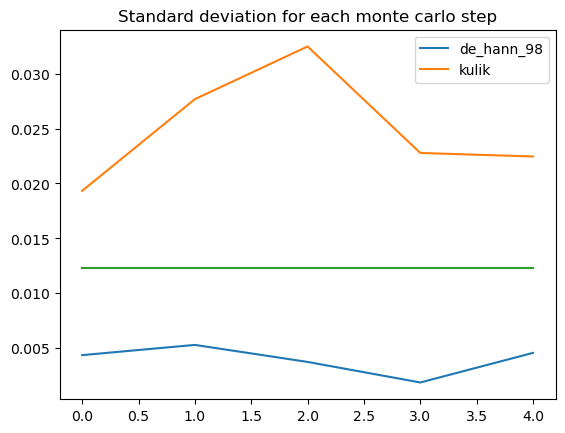

In [6]:
from extreme_utils import *
from main_functions import *


nb_monte_carlo_steps = 5
inv_gamma = 3
size_sample = 20000
list_methods = [
    {"method_name": "de_hann_98",
     "method": get_bootstrap_variance_de_hann_98,
#      "argument_list": [sample, nb_bootstrap, bootstrap_size, k0_opti]
    },
    {"method_name": "kulik",
     "method": get_bootstrap_variance_kulik,
#      "argument_list": [sample, nb_bootstrap, bootstrap_size, k0_opti] 
    }
]
output_dict = get_bootstrap_vs_monte_carlo(nb_monte_carlo_steps,
                                inv_gamma,
                                size_sample,
                                list_methods)

with open(f"mc_{nb_monte_carlo_steps}_invg_{inv_gamma}_size_{size_sample}.json", "w") as write_file:
    json.dump(output_dict, write_file)
    
with open(f"mc_{nb_monte_carlo_steps}_invg_{inv_gamma}_size_{size_sample}.json", 'r') as fp:
    output_dict = json.load(fp)

plt.plot(output_dict["de_hann_98_std"], label="de_hann_98")
plt.plot(output_dict["kulik_std"], label="kulik")
plt.plot([output_dict["hill_estimator_std"] for i in range(len(output_dict["kulik_std"]))], label="")
plt.title("Standard deviation for each monte carlo step")
plt.legend()

size_sample_loop:   0%|          | 0/19 [00:00<?, ?it/s]

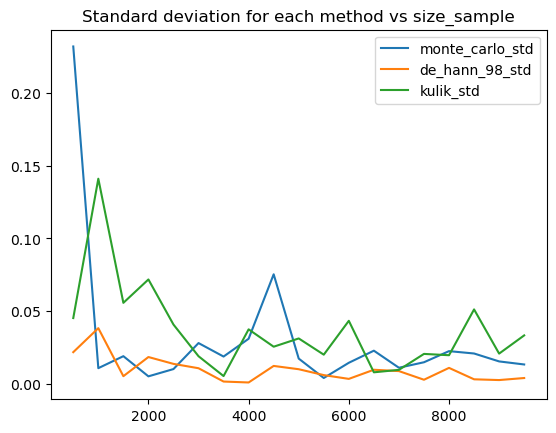

In [2]:
from main_functions import *
from main_functions import get_monte_carlo_methods_std_for_a_step


list_methods = [
    {"method_name": "de_hann_98",
     "method": get_bootstrap_variance_de_hann_98,
#      "argument_list": [sample, nb_bootstrap, bootstrap_size, k0_opti]
    },
    {"method_name": "kulik",
     "method": get_bootstrap_variance_kulik,
#      "argument_list": [sample, nb_bootstrap, bootstrap_size, k0_opti] 
    }
] 

std_vs_size_dict = {
    "monte_carlo_std": list(),
    "de_hann_98_std": list(),
    "kulik_std": list(),
}
inv_gamma = 3
nb_monte_carlo_steps = 3
size_samples = list(range(500,10000,500))
for size_sample in tqdm(size_samples, desc = f"size_sample_loop"):
    output_dict = get_monte_carlo_methods_std_for_a_step(nb_monte_carlo_steps,
                                inv_gamma,
                                size_sample,
                                list_methods)
    for key in output_dict.keys():
        std_vs_size_dict[key].append(output_dict[key])

with open(f"std_vs_sample_size_nb_monte_carlo_{nb_monte_carlo_steps}.json", "w") as write_file:
    json.dump(std_vs_size_dict, write_file)
    
with open(f"std_vs_sample_size_nb_monte_carlo_{nb_monte_carlo_steps}.json", 'r') as fp:
    std_vs_size_dict = json.load(fp)
        

plt.plot(size_samples, std_vs_size_dict["monte_carlo_std"], label="monte_carlo_std")
plt.plot(size_samples, std_vs_size_dict["de_hann_98_std"], label="de_hann_98_std")
plt.plot(size_samples, std_vs_size_dict["kulik_std"], label="kulik_std")
plt.title("Standard deviation for each method vs size_sample")
plt.legend()